**About** **Dataset**

'''Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.'''

The objective is to identify (predict) different fashion products from the given images using CNN.

In [ ]:
#use inbuilt dataset fashion_mnist
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import cv2

In [ ]:
#image recoginization use cnn
#pre-requisites for cnn
#1.python
#2.opencv
#3.tensorflow with keras :it is framework of DL
#data set is supervised learning 

In [ ]:
#in cnn there are total 3 layers 
#1.convolution layer:to select primitive features
#2.relu layer:rectified layer unit,compare if value>=0 then keep same value otherwise 0
#3.pooling layer=here we use maxpooling it used to shrink the image(2x2)

In [ ]:
#load inbuilt dataset fashion_mnist which
# defined in tensorflow.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=tensorflow.keras.datasets.fashion_mnist.load_data()
#load_data():to load inbuild data set 

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,X_test.shape#pixel(size)=28x28 
#training 60000 images
#testing 10000 images

((60000, 28, 28), (10000, 28, 28))

In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
np.min(Y_train)

0

In [ ]:
np.max(Y_train)

9

In [ ]:
#total 10 class 

In [ ]:
X_train[0]#to check matrix of 1st image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

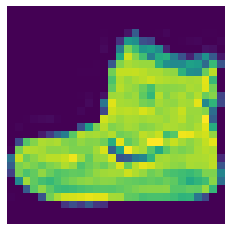

In [ ]:
#to see image
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [ ]:
Y_train[0]#show category for 1st image

9

In [ ]:
#category user defined list object
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

#create list of class_labels
category=["T-shirt/top","Trouser","Pullover","Dress","coat","Sandal","Shirt",
          "Sneaker","Bag","Ankle boot"]
print(category)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
for i,v in enumerate(category):
  print(i,v)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


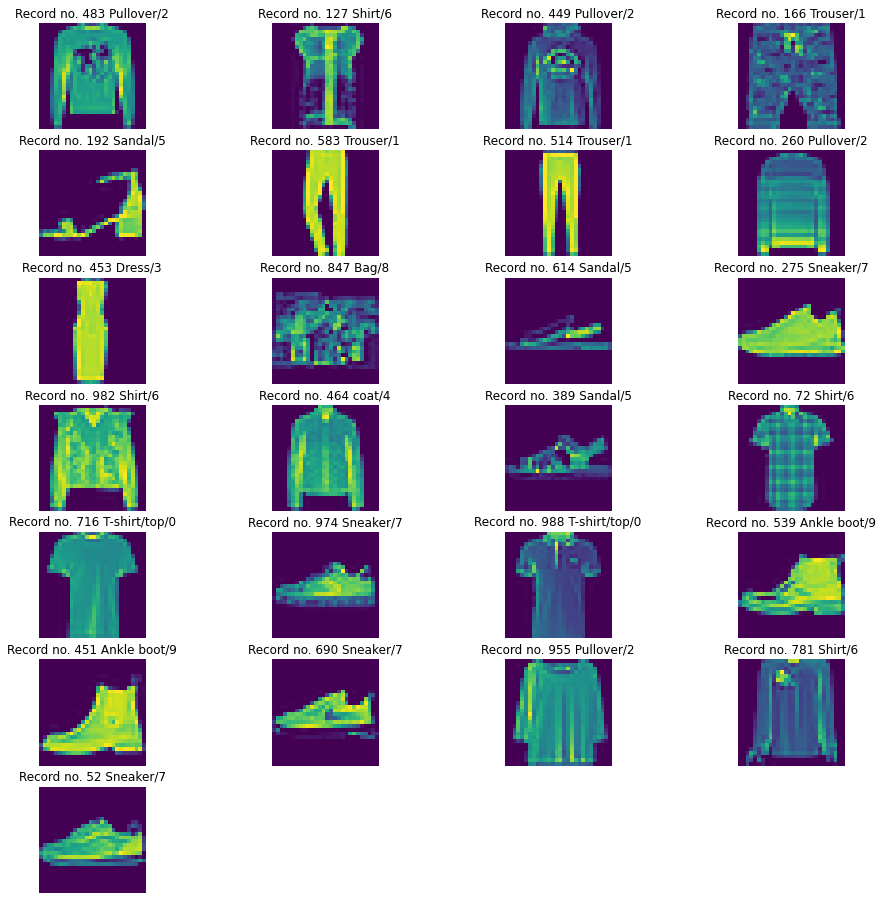

In [ ]:
#to show 25 images randomly from first 1000 images
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25): 
  plt.subplot(7,4,j);j=j+1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title("Record no. {} {}/{}".format(i,category[Y_train[i]],Y_train[i]))

In [ ]:
X_train.ndim,X_test.ndim

(3, 3)

In [ ]:
#compulsory :4 dimension input images required for training and then tetsing
#but we have 3 dimension input images

#check dimension of X_train and X_test
print("Dimension of training data : ",X_train.ndim)

#to show shape of X_train
print("Shape of training data : ",X_train.shape)

Dimension of training data :  3
Shape of training data :  (60000, 28, 28)


In [ ]:
#check dimension of X_train and X_test
print("Dimension of testing data : ",X_test.ndim)

#to show shape of X_test
print("Shape of testing data : ",X_test.shape)

Dimension of testing data :  3
Shape of testing data :  (10000, 28, 28)


In [ ]:
#converts 3D dimension image into 4 Dimension image ,use inbuilt fn
#expand_dims() which is define in numpy library
#first convert 3D X_train input images to 4 Dimension :-
#-1 means axis=-1 add in right side
#if axis=0 then add in left side
X_train=np.expand_dims(X_train,-1)
print(X_train.ndim)#check dimension of X_train
print(X_train.shape)

4
(60000, 28, 28, 1)


In [ ]:
#now convert 3D X_test input images to 4 Dimension :-
#-1 means axis=-1 add in right side
#if axis=0 then add in left side
X_test=np.expand_dims(X_test,-1)
print(X_test.ndim)#check dimension of X_test
print(X_test.shape)#check shape of X_test

4
(10000, 28, 28, 1)


In [ ]:
#Apply scalling for X_train and X_test input images
#scaling always on input
#images pixel 0-255 so in between min and max scaler apply
#images range 0 to 255
#min 0 and max 255
#Xtrain-Xtrainmin/Xtrainmax-Xtrainmin
#apply min max scaler means normalised : it is also known as feature scaling
X_train=X_train/255 #convert to numpy array
X_test=X_test/255 #convert to nympy array

In [ ]:
'''
or 
from sklearn.preprocessing import MinMaxScaler
#creat object of MinMaxScaler class
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transfrom(X_test)'''

'\nor \nfrom sklearn.preprocessing import MinMaxScaler\n#creat object of MinMaxScaler class\nmms=MinMaxScaler()\nX_train=mms.fit_transform(X_train)\nX_test=mms.transfrom(X_test)'

In [ ]:
#to show first images
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#to show first imnage in testing
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#X_train , Y_train :60000 samples
#train with the help of CNN 
#and check model overfitting also
#split training data into 80% and 20% 
#80% means for training purpose and 20% means for validation purpose
#means check overfit the model in each iteration(epochs)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,
                                             random_state=1)

In [ ]:
X_train.shape,X_val.shape
#48000 training data
#12000 validation data

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
#perform the model :Model Building with CNN(Convolutional neural network)
#create object of Sequential Class 
#Conv2D convrt to gray scale this is Convolutional layer
#32 feature primptive feature
#kernal=for matrix size 
#padding use for avoid overlapping
#strides means shiffting 28 width,28 height 1 means single channel means grey scale img
#maxpooling shrink images 2 by 2
#Flatten means convert to 1D

In [ ]:
#Perform the model : Model Building with CNN (Convolutional neural network)
#create object of Sequential class 
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
                    padding='valid',activation='relu',input_shape=[28,28,1]),
                tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                tensorflow.keras.layers.Flatten(),
  tensorflow.keras.layers.Dense(units=128,activation='relu'),#hidden layer
  tensorflow.keras.layers.Dense(units=10,activation='softmax') #output layer
])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#create a procedure for early stopping
#call inbuilt class: EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#create the object of EarlyStopping class
cb=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
    )

In [ ]:
#train the model 
train_model=model.fit(X_train,Y_train,batch_size=512,epochs=5000,callbacks=cb,
          validation_data=(X_val,Y_val))

Epoch 1/5000
94/94 [==============================] - 48s 490ms/step - loss: 0.6080 - accuracy: 0.7966 - val_loss: 0.3916 - val_accuracy: 0.8627
Epoch 2/5000
94/94 [==============================] - 26s 282ms/step - loss: 0.3708 - accuracy: 0.8705 - val_loss: 0.3513 - val_accuracy: 0.8743
Epoch 3/5000
94/94 [==============================] - 26s 274ms/step - loss: 0.3253 - accuracy: 0.8859 - val_loss: 0.3280 - val_accuracy: 0.8803
Epoch 4/5000
94/94 [==============================] - 28s 297ms/step - loss: 0.3002 - accuracy: 0.8931 - val_loss: 0.3013 - val_accuracy: 0.8927
Epoch 5/5000
94/94 [==============================] - 26s 278ms/step - loss: 0.2776 - accuracy: 0.9012 - val_loss: 0.2890 - val_accuracy: 0.8965
Epoch 6/5000
94/94 [==============================] - 25s 268ms/step - loss: 0.2610 - accuracy: 0.9080 - val_loss: 0.2849 - val_accuracy: 0.8976
Epoch 7/5000
94/94 [==============================] - 28s 294ms/step - loss: 0.2480 - accuracy: 0.9107 - val_loss: 0.2705 - val_ac

In [ ]:
#evaluate training score and loss
model.evaluate(X_train,Y_train)

1500/1500 [==============================] - 11s 7ms/step - loss: 0.0802 - accuracy: 0.9718


[0.08020426332950592, 0.9717708230018616]

In [ ]:
#evaluate val score and loss
model.evaluate(X_val,Y_val)

375/375 [==============================] - 3s 7ms/step - loss: 0.3015 - accuracy: 0.9110


[0.3014536499977112, 0.9110000133514404]

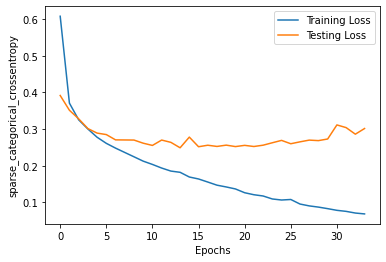

In [ ]:
#visaulisation to loss training graph and testing graph
#train_model
plt.plot(train_model.history['loss'],label="Training Loss")
plt.plot(train_model.history['val_loss'],label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("sparse_categorical_crossentropy")
plt.legend()
plt.show()

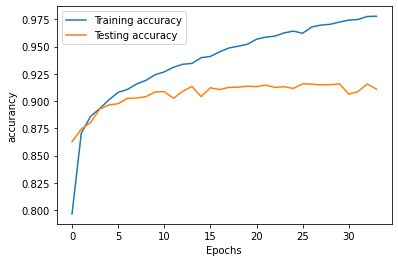

In [ ]:
#visaulisation to accurancy of training graph and testing graph
#train_model
plt.plot(train_model.history['accuracy'],label="Training accuracy")
plt.plot(train_model.history['val_accuracy'],label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accurancy")
plt.legend()
plt.show()

In [ ]:
#test the model with 30% data
Y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 2s 6ms/step


In [ ]:
Y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.03, 0.  ]], dtype=float32)

In [ ]:
#list comprehension
Y_pred=[np.argmax(i) for i in Y_pred]
Y_pred

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 2,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 2,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 2,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 2,
 6,
 2,


In [ ]:
#cat
class1=[category[i] for i in Y_pred]
class1

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'coat',
 'Sandal',
 'Sandal',
 'Dress',
 'Pullover',
 'Trouser',
 'Pullover',
 'coat',
 'Bag',
 'T-shirt/top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Pullover',
 'Shirt',
 'T-shirt/top',
 'Ankle boot',
 'Dress',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'T-shirt/top',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Pullover',
 'Pullover',
 'coat',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'coat',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 'Pullover',
 'Dress',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 'Pullover',
 'Shirt',
 'Pullover',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle boot',
 'Sandal',
 'T-shirt/top',
 'Dress',

In [ ]:
#to genrate report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#f1 score check

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.76      0.92      0.83      1000
           3       0.89      0.94      0.91      1000
           4       0.91      0.76      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.74      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[846   0  24  25   2   1  94   0   8   0]
 [  0 982   0  12   1   0   4   0   1   0]
 [ 17   1 916   7  21   1  36   0   1   0]
 [ 12   4  15 938  11   0  15   0   5   0]
 [  2   2 152  35 757   0  52   0   0   0]
 [  0   0   0   1   0 969 

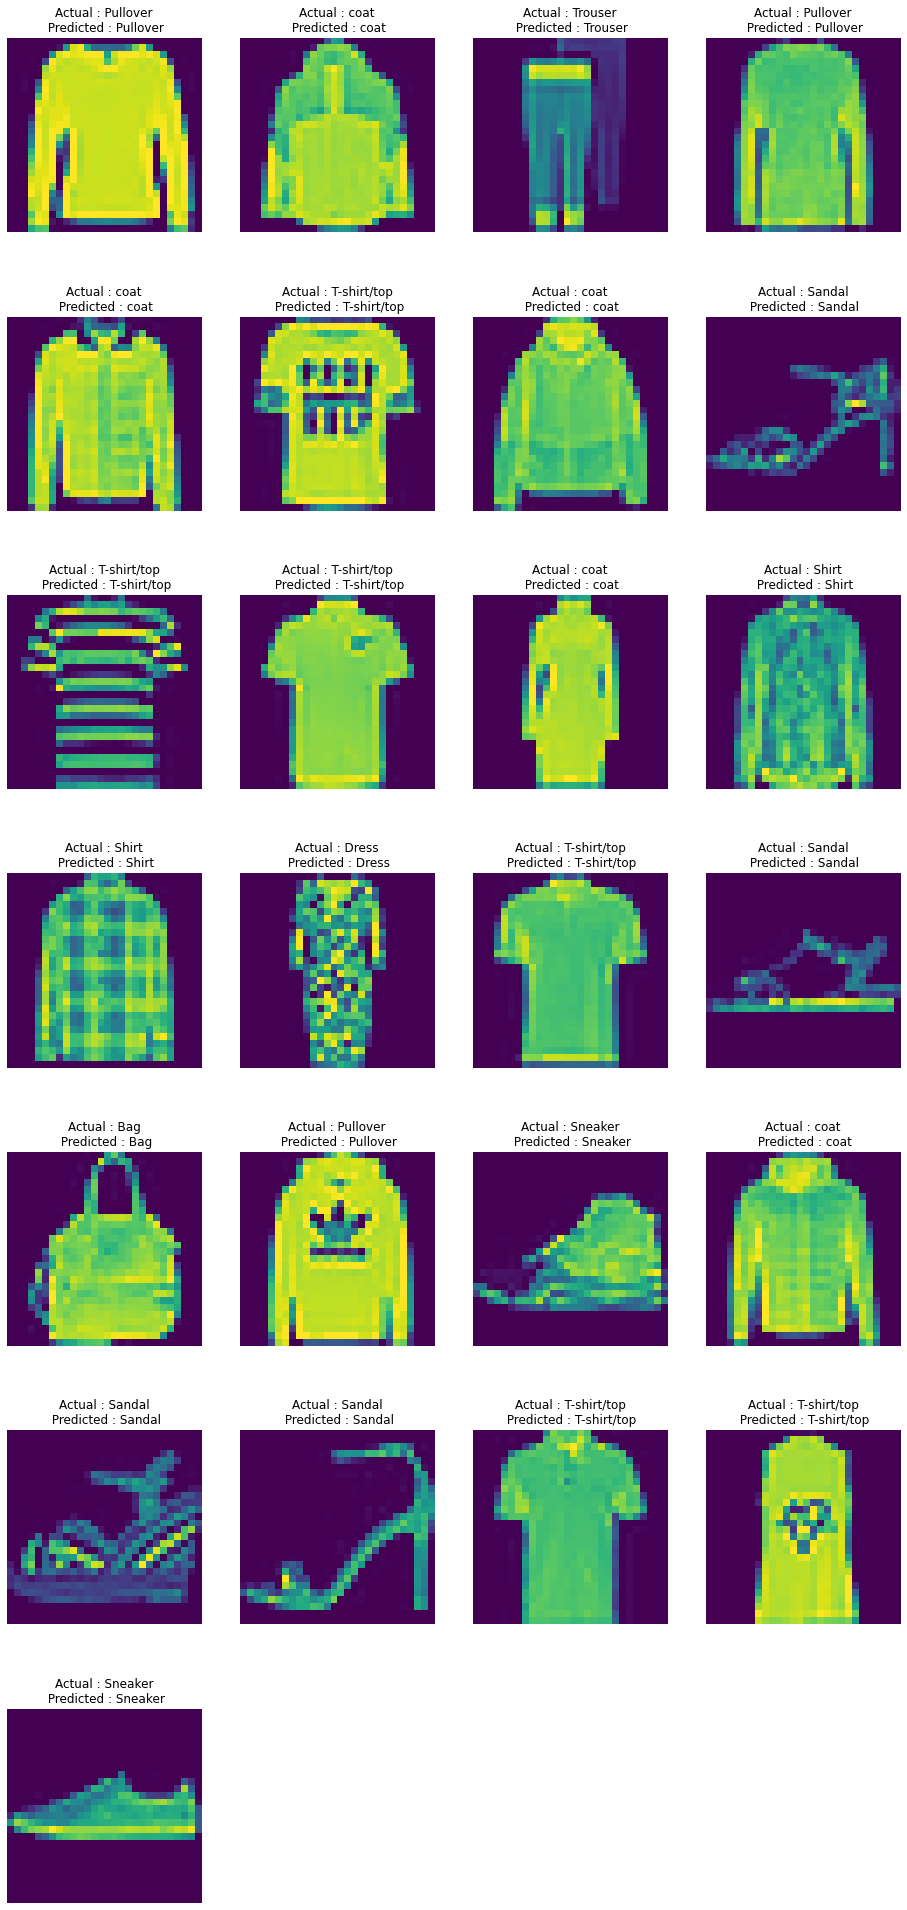

In [ ]:
#to Show 25 images randomly from first 1000 images
plt.figure(figsize=(16,35))
j=1
for i in np.random.randint(0,1000,25):

  plt.subplot(7,4,j);j=j+1
  plt.imshow(X_test[i].reshape(28,28))# grey scale 2D
  plt.axis('off')
  plt.title("Actual : {}\n Predicted : {}".
            format(category[Y_test[i]],category[Y_pred[i]]))

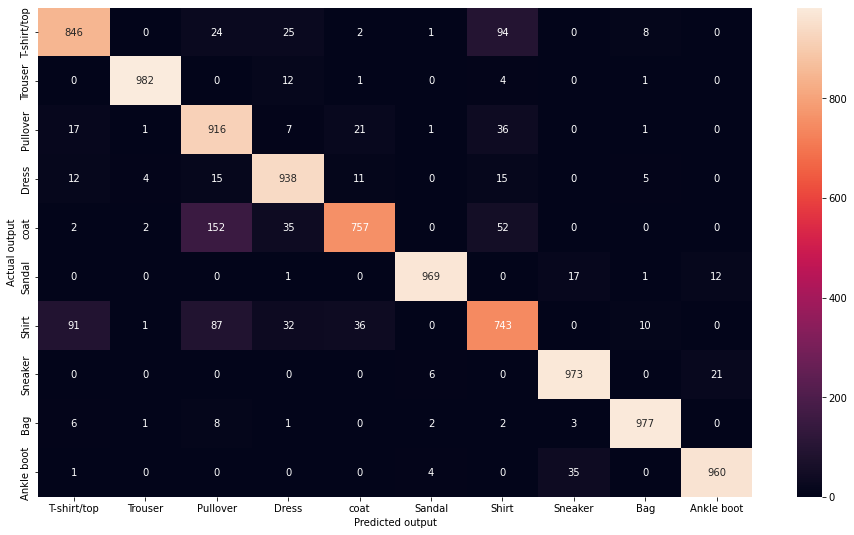

In [ ]:
#create heatmap
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(16,9))
sb.heatmap(cm,annot=True,fmt="d",xticklabels=category,yticklabels=category)#fmt="d" fmt int 
#fmt means format and  d means int
plt.xlabel("Predicted output")
plt.ylabel("Actual output")
plt.show()

In [ ]:
#conclusion
#here  f1-score is good as well as  accuracy is 91% and training accuracy is greater than testing accuracy so model is perfect